# Figure S1: Overview of datasets

In [23]:
import sys


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
import seaborn as sns
import sklearn.linear_model

In [33]:
data=pd.read_hdf('../data/EDFigure1.h5')

## Extended Data Figure 1: Overview of datasets, synthetic data, & original pi-VAE implementation vs. modified conv-pi-VAE

Text(0.5, 0, 'Left')

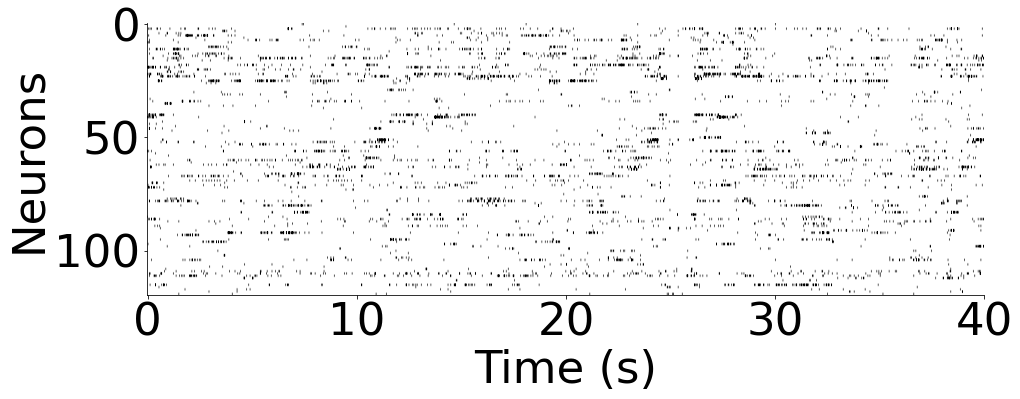

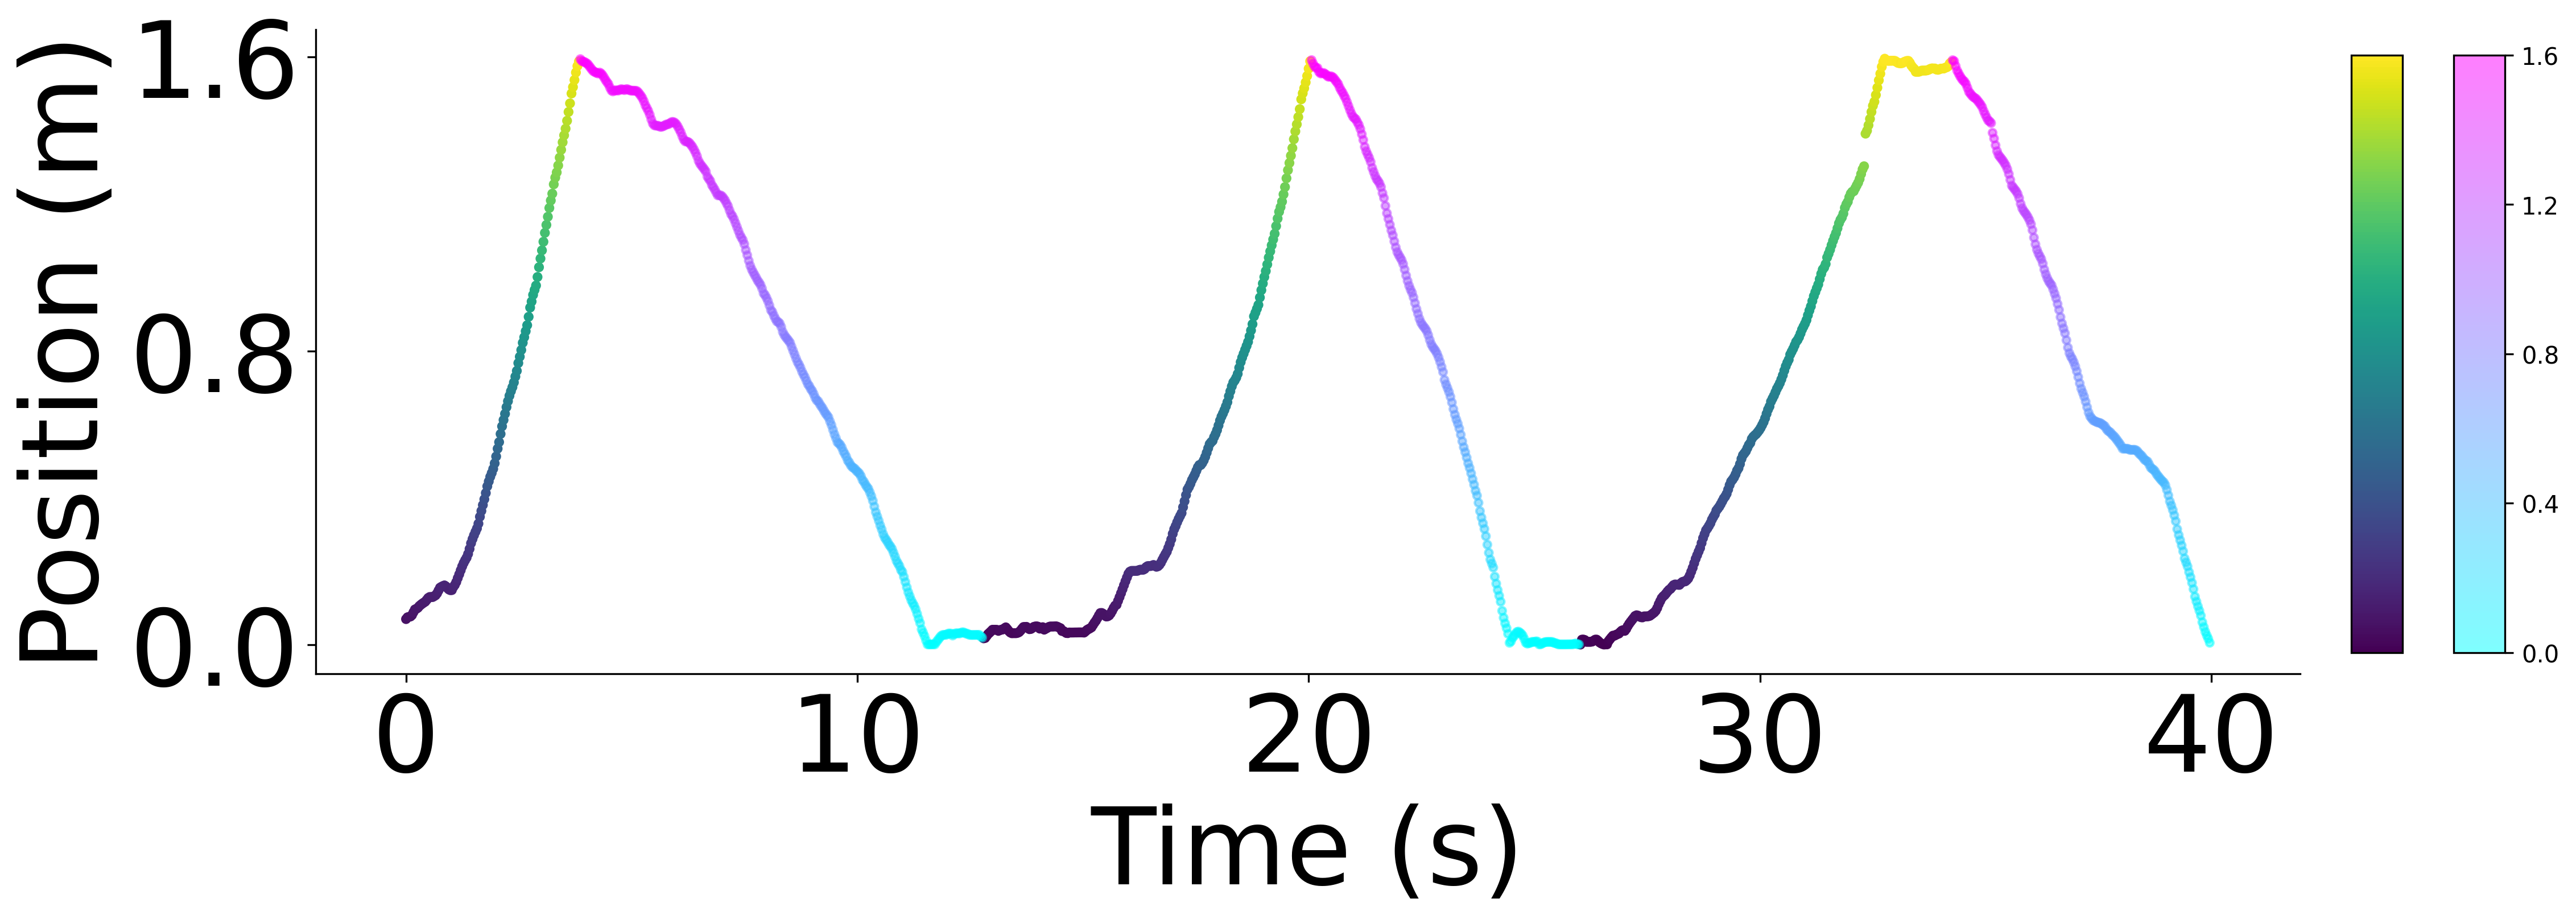

In [12]:
rat_neural = data['rat']['neural']
rat_behavior = data['rat']['behavior']
fig=plt.figure(figsize=(15,5))

ax=plt.subplot(111)
ax.imshow(rat_neural.T, aspect= 'auto', cmap='gray_r', vmax=1)
plt.ylabel('Neurons', fontsize=45)
plt.xlabel('Time (s)', fontsize= 45)
plt.xticks(np.linspace(0, len(rat_neural),5), np.arange(0,45,10))
plt.yticks([0,50,100], [0,50,100])
plt.xticks(fontsize = 45)
plt.yticks(fontsize = 45)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

r=rat_behavior[:,1]==1
l=rat_behavior[:,1]==0
fig = plt.figure(figsize=(15,5), dpi=300)
ax=plt.subplot(111)
ax_r=ax.scatter(np.arange(len(rat_behavior))[r]*0.025, rat_behavior[r,0],  c=rat_behavior[r,0], cmap = 'viridis', s=10)
ax_l=ax.scatter(np.arange(len(rat_behavior))[l]*0.025, rat_behavior[l,0],  c=rat_behavior[l,0], cmap='cool', s=10, alpha = 0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Position (m)', fontsize=45)
plt.xlabel('Time (s)', fontsize= 45)
plt.xticks(fontsize = 45)
plt.yticks(np.linspace(0,1.6,3), fontsize = 45)
plt.xticks(np.linspace(0, len(rat_behavior),5)*0.025, np.arange(0,45,10))
cb_r_axes = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb_l_axes = fig.add_axes([0.96, 0.15, 0.02, 0.7]) 
cb_r = plt.colorbar(ax_r, cax = cb_r_axes,boundaries=np.linspace(0,1.6, 200))
cb_l = plt.colorbar(ax_l, cax = cb_l_axes, boundaries=np.linspace(0,1.6,200), ticks = np.linspace(0,1.6, 5)) 
cb_r.set_ticks([])

cb_r.ax.set_xlabel('Right', fontsize = 15)
cb_l.ax.set_xlabel('Left', fontsize = 15)

## Monkey S1 dataset

(-7.249750447273255, 6.267432045936585, -4.10022519826889, 3.132592189311981)

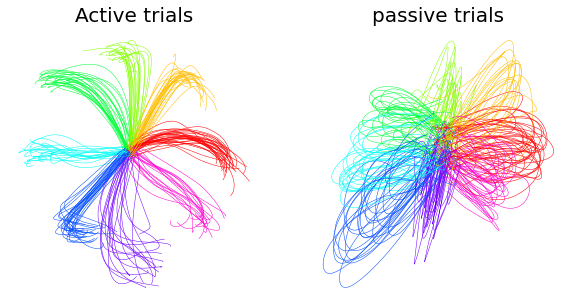

In [13]:
active_target = data['monkey']['behavior']['active']['target']
passive_target = data['monkey']['behavior']['passive']['target']
active_pos = data['monkey']['behavior']['active']['position']
passive_pos = data['monkey']['behavior']['passive']['position']

fig=plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('Active trials', fontsize=20)
for n,i in enumerate(active_pos.reshape(-1, 600,2)):
    k = active_target[n*600]
    ax1.plot(i[:,0], i[:,1], color=plt.cm.hsv(1/8*k), linewidth = 0.5)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
plt.axis('off')
ax2 = plt.subplot(1,2,2)
ax2.set_title('passive trials', fontsize=20)
for n,i in enumerate(passive_pos.reshape(-1, 600,2)):
    k = passive_target[n*600]
    ax2.plot(i[:,0], i[:,1], color=plt.cm.hsv(1/8*k), linewidth = 0.5)
plt.axis('off')

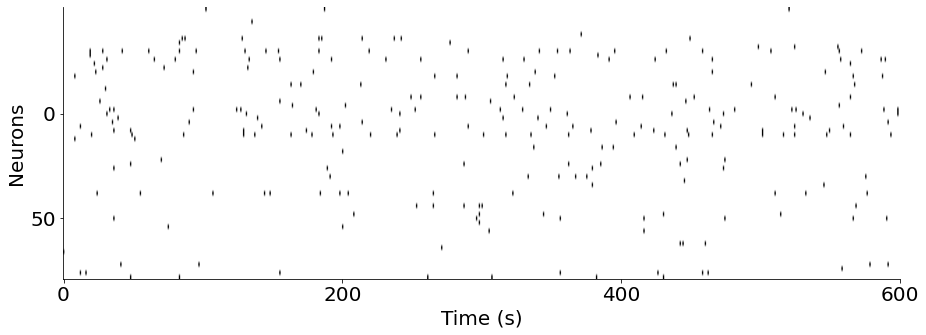

In [14]:

fig=plt.figure(figsize=(15,5))
ephys = data['monkey']['neural']
ax=plt.subplot(111)
ax.imshow(ephys[:600].T, aspect= 'auto', cmap='gray_r', vmax=1, vmin=0)
plt.ylabel('Neurons', fontsize=20)
plt.xlabel('Time (s)', fontsize= 20)
plt.xticks([0,200,400,600], ['0','200','400', '600'], fontsize = 20)
plt.yticks(fontsize = 20)
plt.yticks([25,50], ['0', '50'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Allen dataset

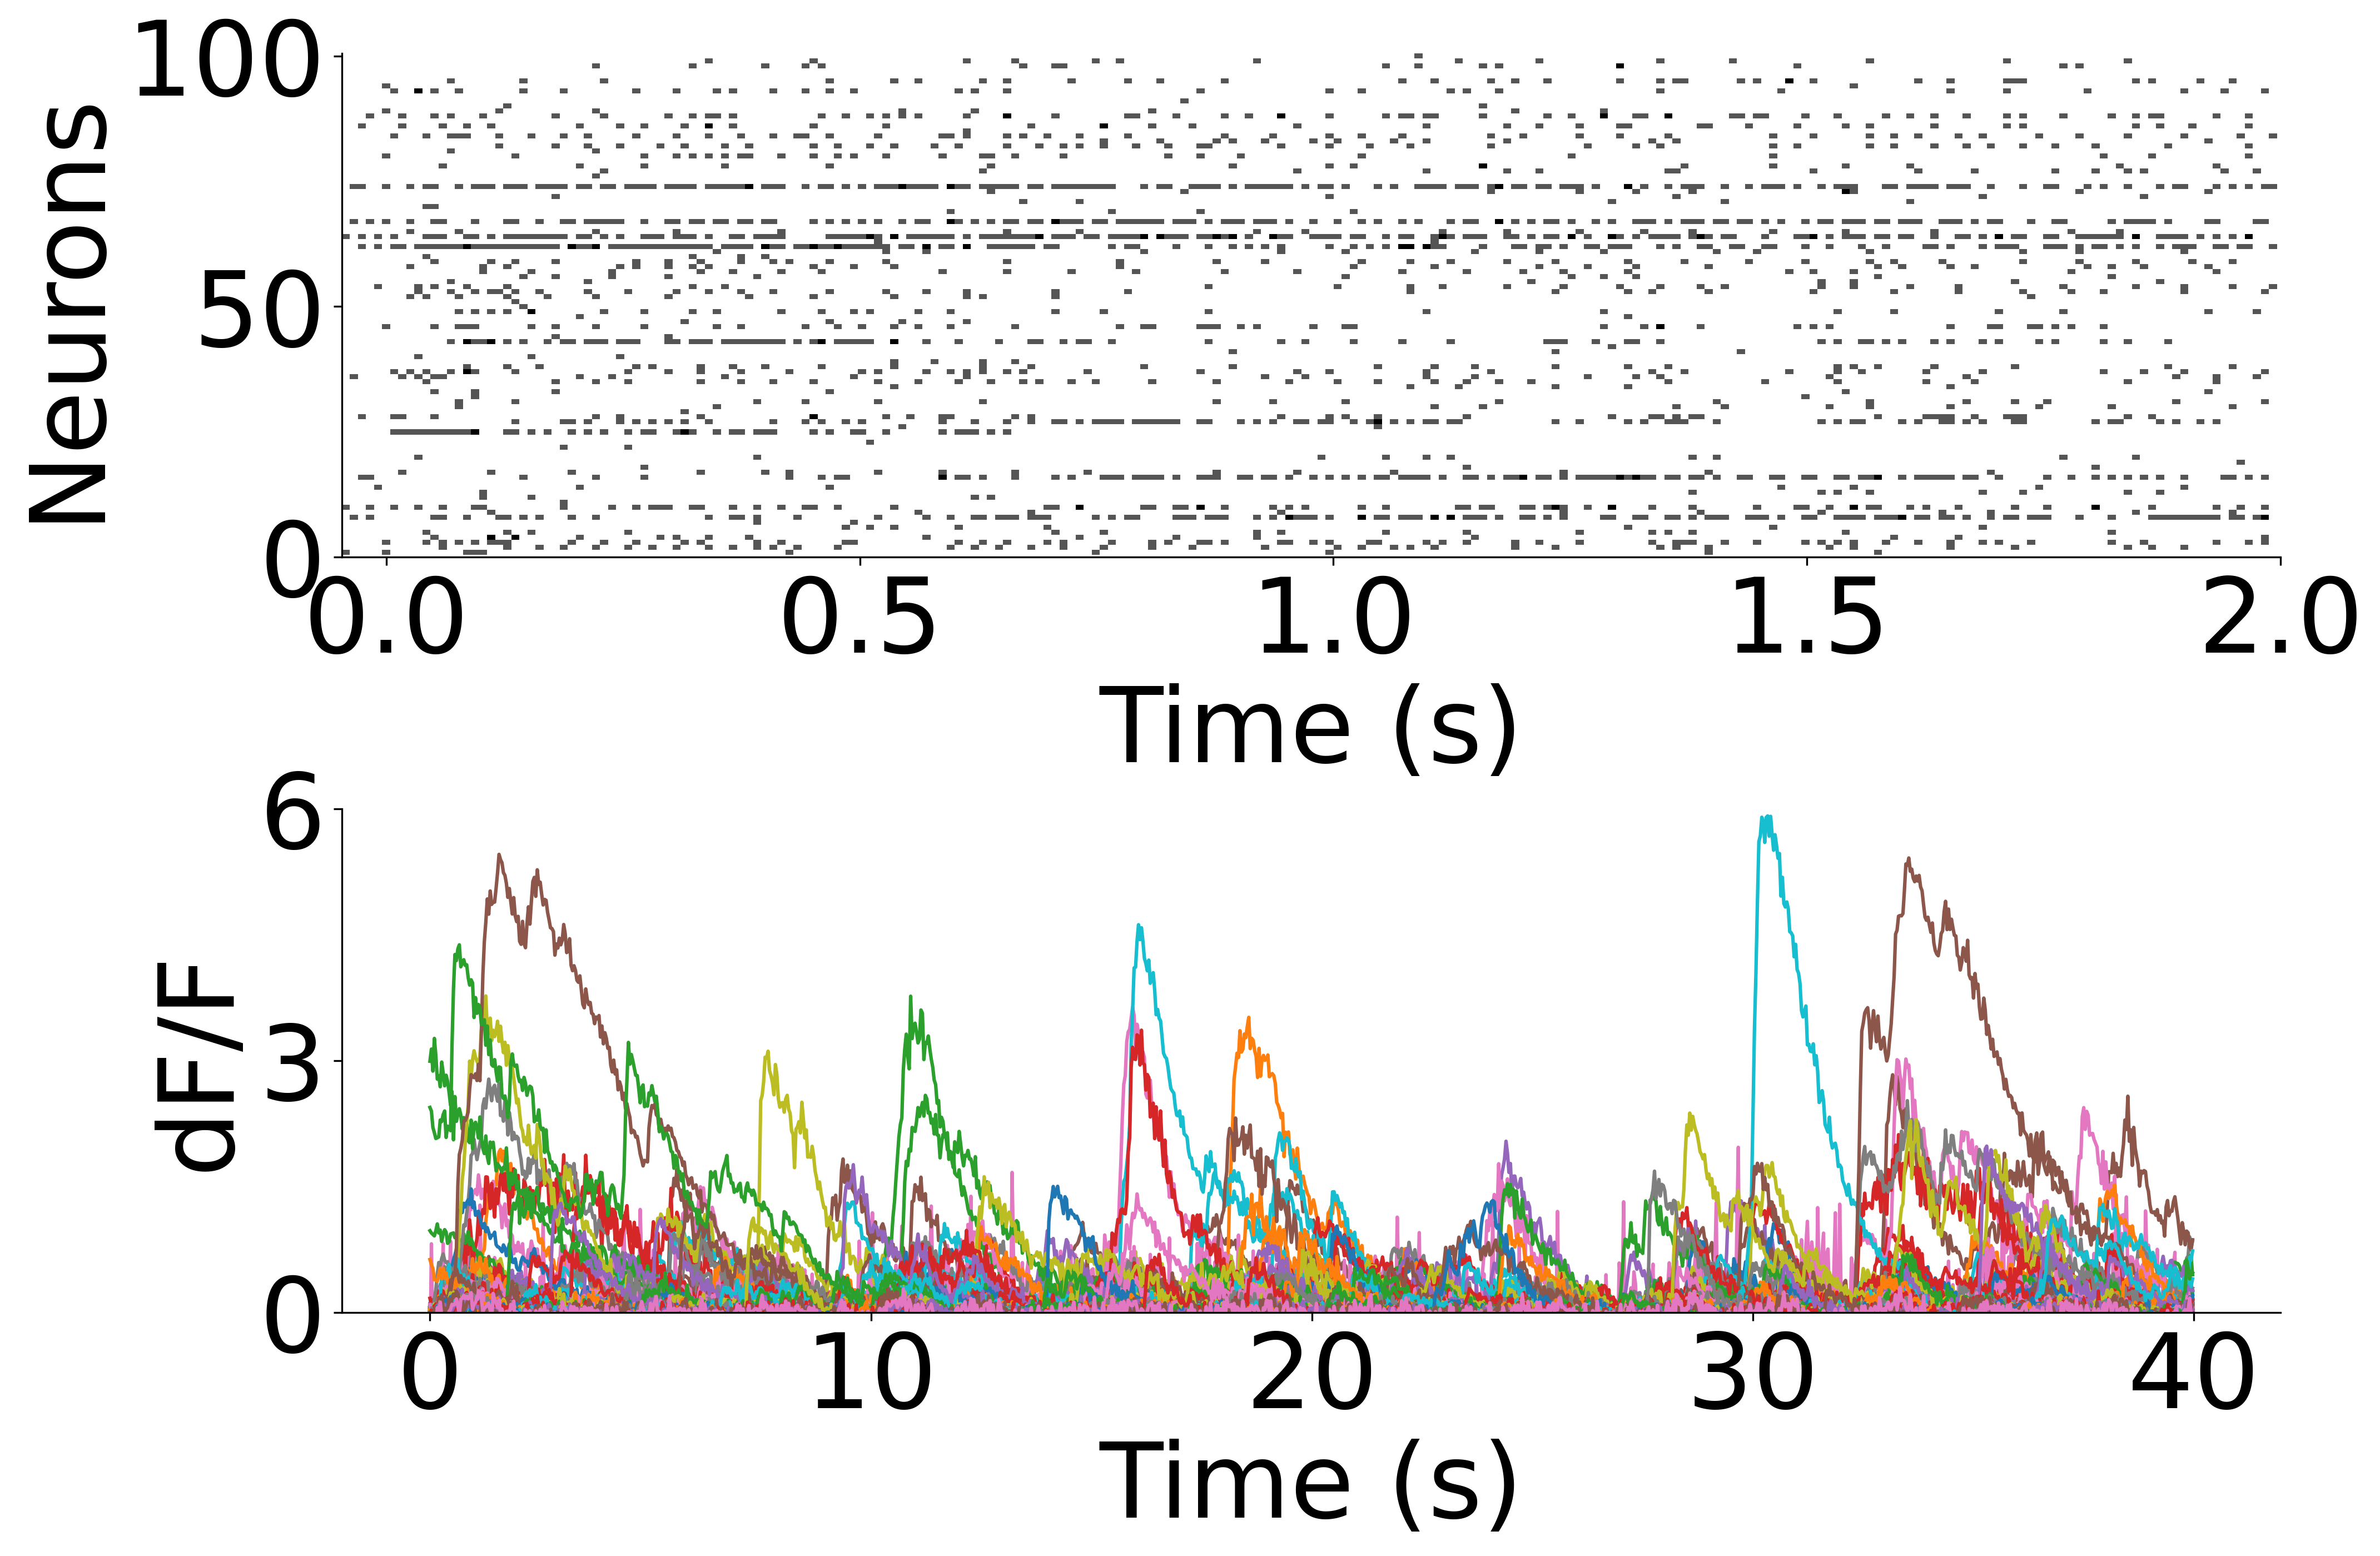

In [15]:
neuropixel=data['mouse']['neural']['np'] 
ca=data['mouse']['neural']['ca'] 
fig=plt.figure(figsize=(15,10), dpi=300)
plt.subplots_adjust(hspace=0.5)
ax1=plt.subplot(2,1,1)
plt.imshow(neuropixel[:100, :240], aspect= 'auto', vmin = 0, vmax=1.5, cmap = 'gray_r')
plt.ylabel('Neurons', fontsize=45)
plt.xlabel('Time (s)', fontsize= 45)
plt.xticks(np.linspace(5,240,5), np.linspace(0, 2, 5 ) )
plt.yticks([0,50,100], [100,50,0])
plt.xticks(fontsize = 45)
plt.yticks(fontsize = 45)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2=plt.subplot(2,1,2)
ax2.plot(ca.T)
plt.ylabel('dF/F', fontsize=45)
plt.xlabel('Time (s)', fontsize= 45)
plt.ylim(0,6)
#plt.xlim(0,1200)
plt.xticks(np.linspace(0, 1200,5), np.linspace(0, 40, 5 ).astype(int), fontsize=20, )
plt.yticks([0,3,6], [0,3,6], fontsize=45)
plt.xticks(fontsize = 45)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

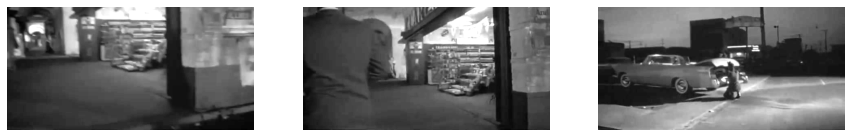

In [16]:
plt.figure(figsize=(15,5))
for n,i in enumerate(data['mouse']['behavior']):
    ax = plt.subplot(1,3,n+1)
    ax.imshow(i, cmap='gray')
    plt.axis('off')

## Synthetic data experiment

In [17]:
def reindex(dic, list_name= ['poisson', 'gaussian','laplace', 'uniform','refractory_poisson']):
    return rename(pd.DataFrame(dic).T.reindex(list_name).T*100)

def rename(df):
    return df.rename(columns = {'poisson': 'Poisson', 'gaussian': 'Gaussian', 'laplace': 'Laplace',
                                              'uniform': 'uniform', 'refractory_poisson': 
                                              'refractory Poisson'})

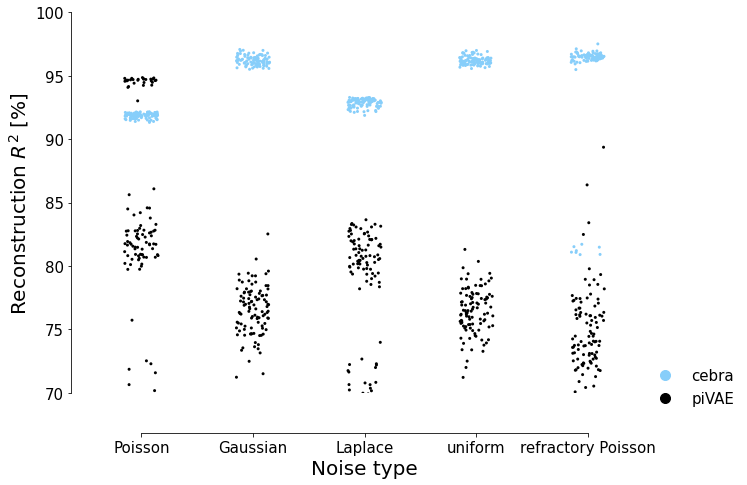

In [18]:
data_pivae = data['noise_exp']['pivae']
data_cebra = data['noise_exp']['cebra']
fig = plt.figure(figsize=(10,7))

ax=plt.subplot(111)

sns.stripplot(data=reindex(data_pivae['x-s']['poisson']), jitter=0.15, s=3, color = 'black', label = 'pi_vae')
sns.stripplot(data=reindex(data_cebra['x-s']['infonce']), jitter = 0.15, s=3, color = 'lightskyblue', label = 'cebra')


ax.set_ylabel('Reconstruction $R^2$ [%]', fontsize=20)
ax.set_xlabel('Noise type', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim((70,100))
ax.tick_params(axis='both', which='major', labelsize=15)
legend_elements = [Line2D([0], [0], markersize=10,linestyle='none', marker = 'o', color='lightskyblue', label='cebra'),
    Line2D([0], [0],markersize=10, linestyle='none', marker = 'o', color='black', label='piVAE'),
                   ]
ax.legend(handles=legend_elements, loc = (1.0,-0.05), frameon=False, fontsize=15)
sns.despine(left = False, right=True, bottom = False, top = True, trim = True, offset={'bottom':40, 'left':15})
plt.savefig('distribution_reconstruction.png', transparent = True, bbox_inches='tight')

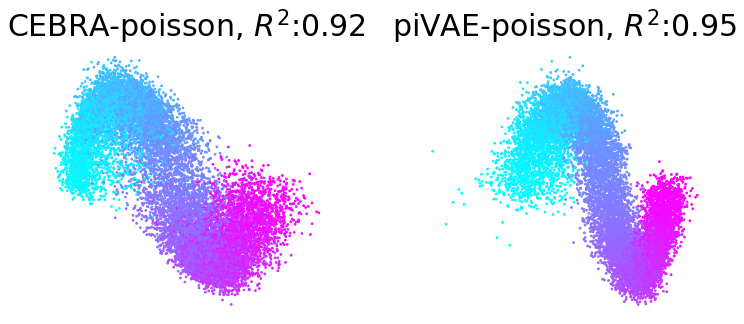

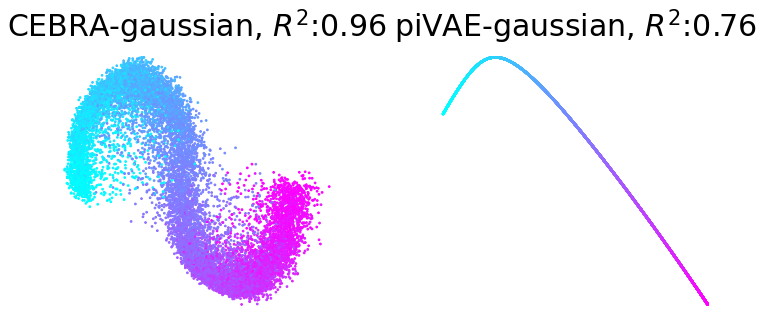

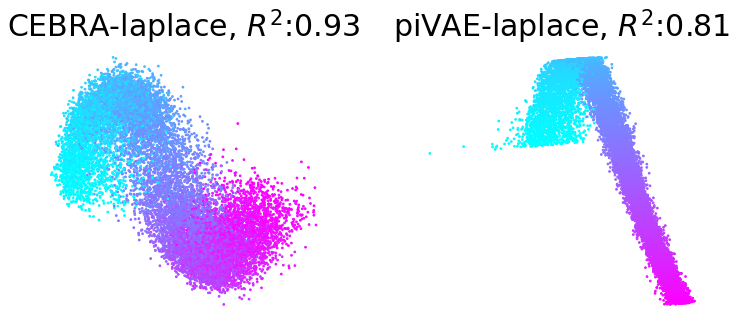

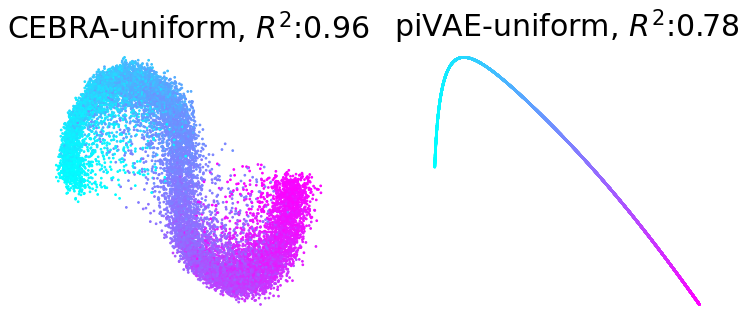

In [19]:
pivae_embs=data['noise_exp_viz']['pivae']
cebra_embs = data['noise_exp_viz']['cebra']
label = data['noise_exp_viz']['label']
z = data['noise_exp_viz']['z']
def fitting(x,y):
    lin_model = sklearn.linear_model.LinearRegression()
    lin_model.fit(x,y)
    return lin_model.score(x,y), lin_model.predict(x)
emission_dict = {'pivae': {}, 'cebra':{}}
    
for i,dist in enumerate(['poisson', 'gaussian', 'laplace', 'uniform']) :
    pivae_emission=pivae_embs[dist]
    cebra_emission=cebra_embs[dist]
    cebra_score, fit_cebra = fitting(cebra_emission, z)
    pivae_score, fit_pivae = fitting(pivae_emission, z)
    fig = plt.figure(figsize=(12,5))
    plt.subplots_adjust(wspace = 0.3)
    ax=plt.subplot(121)
    ax.scatter(fit_cebra[:,0], fit_cebra[:,1], c = label, s=3, cmap = 'cool')
    ax.set_title(f'CEBRA-{dist}, $R^2$:{cebra_score:.2f}', fontsize=30)
    ax.axis('off')
    ax=plt.subplot(122)
    ax.scatter(fit_pivae[:,0], fit_pivae[:,1], c = label, s=3,cmap = 'cool')
    ax.set_title(f'piVAE-{dist}, $R^2$:{pivae_score:.2f}', fontsize=30)
    ax.axis('off')
    fig.savefig(f'emission_viz_{dist}.png', transparent=True, bbox_inches = 'tight')

# original piVAE vs. conv-piVAE

In [ ]:
for model in ["original_pivae", "conv_pivae"]:
    embs = data[model]

    sns.set_style("white")
    fig = plt.figure(figsize=(10, 10))
    plt.title(f"{model}- w/test time labels", fontsize=20, y=1.1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.axis("off")
    ind1, ind2 = 0, 1

    for i in range(4):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.set_title(f"Rat {i+1}", fontsize=1.5)
        plt.axis("off")
        emb = embs["w_label"]["embedding"][i]
        label = embs["w_label"]["label"][i]
        r_ind = label[:, 1] == 1
        l_ind = label[:, 2] == 1
        r = ax.scatter(
            emb[r_ind, ind1], emb[r_ind, ind2], s=1, c=label[r_ind, 0], cmap="viridis"
        )
        l = ax.scatter(
            emb[l_ind, ind1], emb[l_ind, ind2], s=1, c=label[l_ind, 0], cmap="cool"
        )

    fig = plt.figure(figsize=(10, 10))
    plt.title(f"{model}- w/o test time labels", fontsize=20, y=1.1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.axis("off")
    for i in range(4):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.set_title(f"Rat {i+1}", fontsize=15)
        plt.axis("off")
        emb = embs["wo_label"]["embedding"][i]
        label = embs["wo_label"]["label"][i]
        r_ind = label[:, 1] == 1
        l_ind = label[:, 2] == 1
        r = ax.scatter(
            emb[r_ind, ind1], emb[r_ind, ind2], s=1, c=label[r_ind, 0], cmap="viridis"
        )
        l = ax.scatter(
            emb[l_ind, ind1], emb[l_ind, ind2], s=1, c=label[l_ind, 0], cmap="cool"
        )

Text(0.5, 50.5, 'R2')

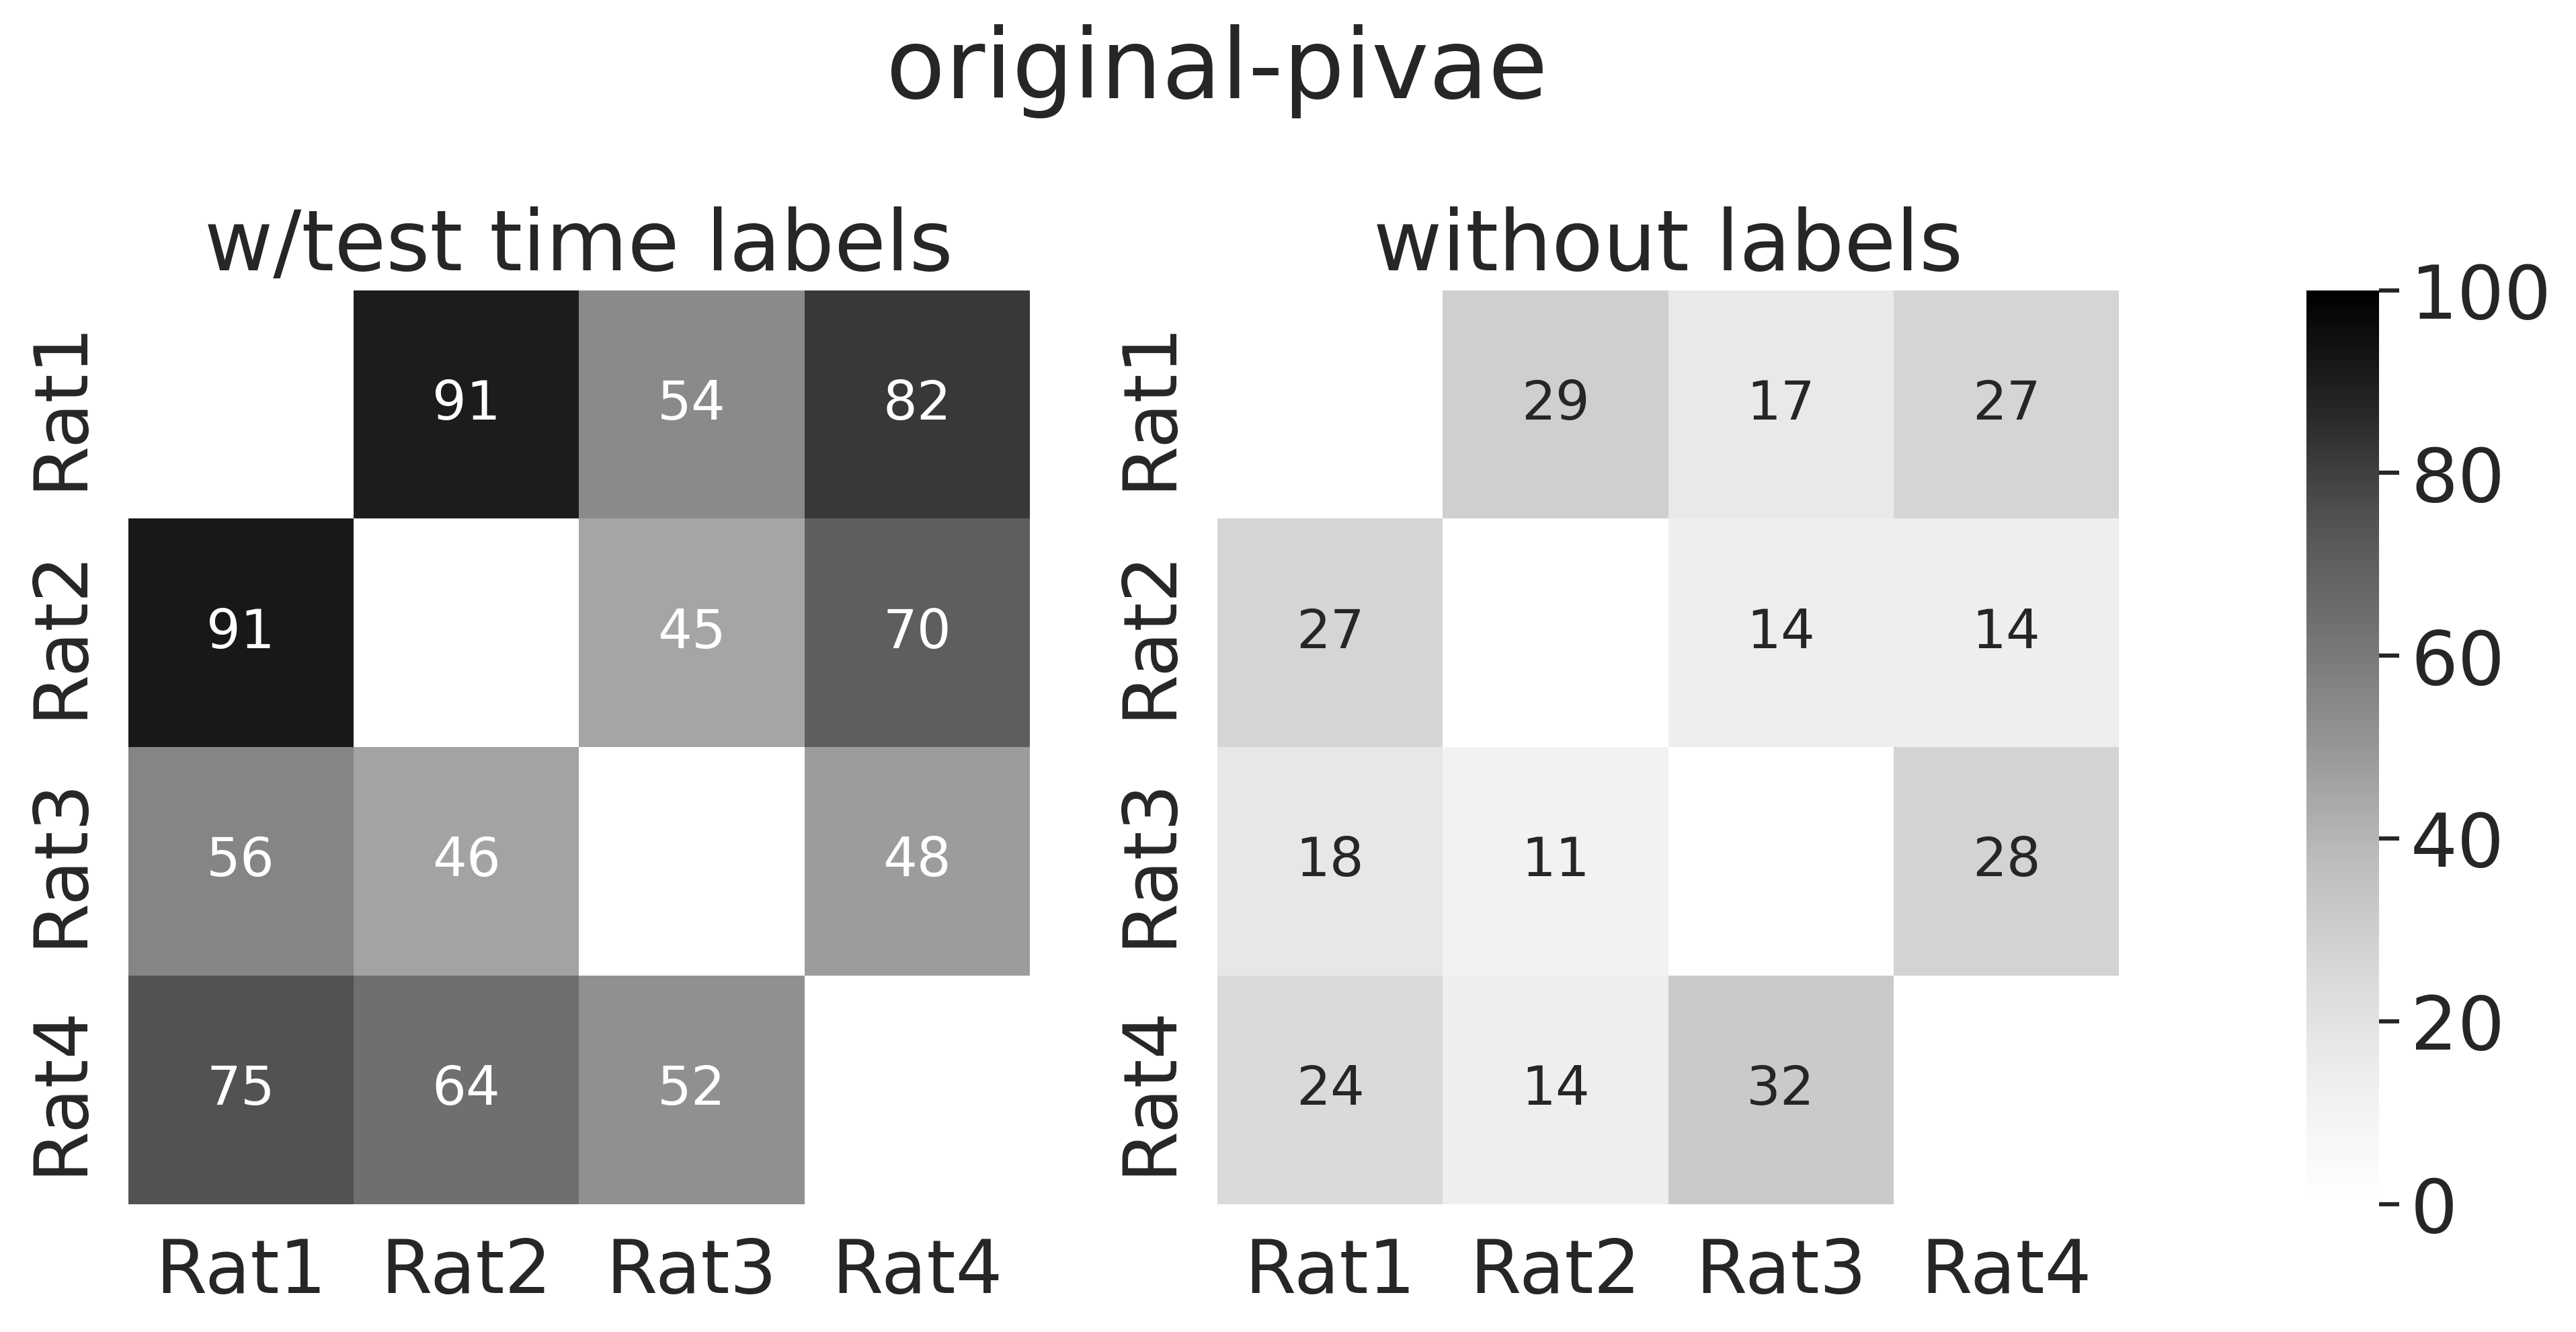

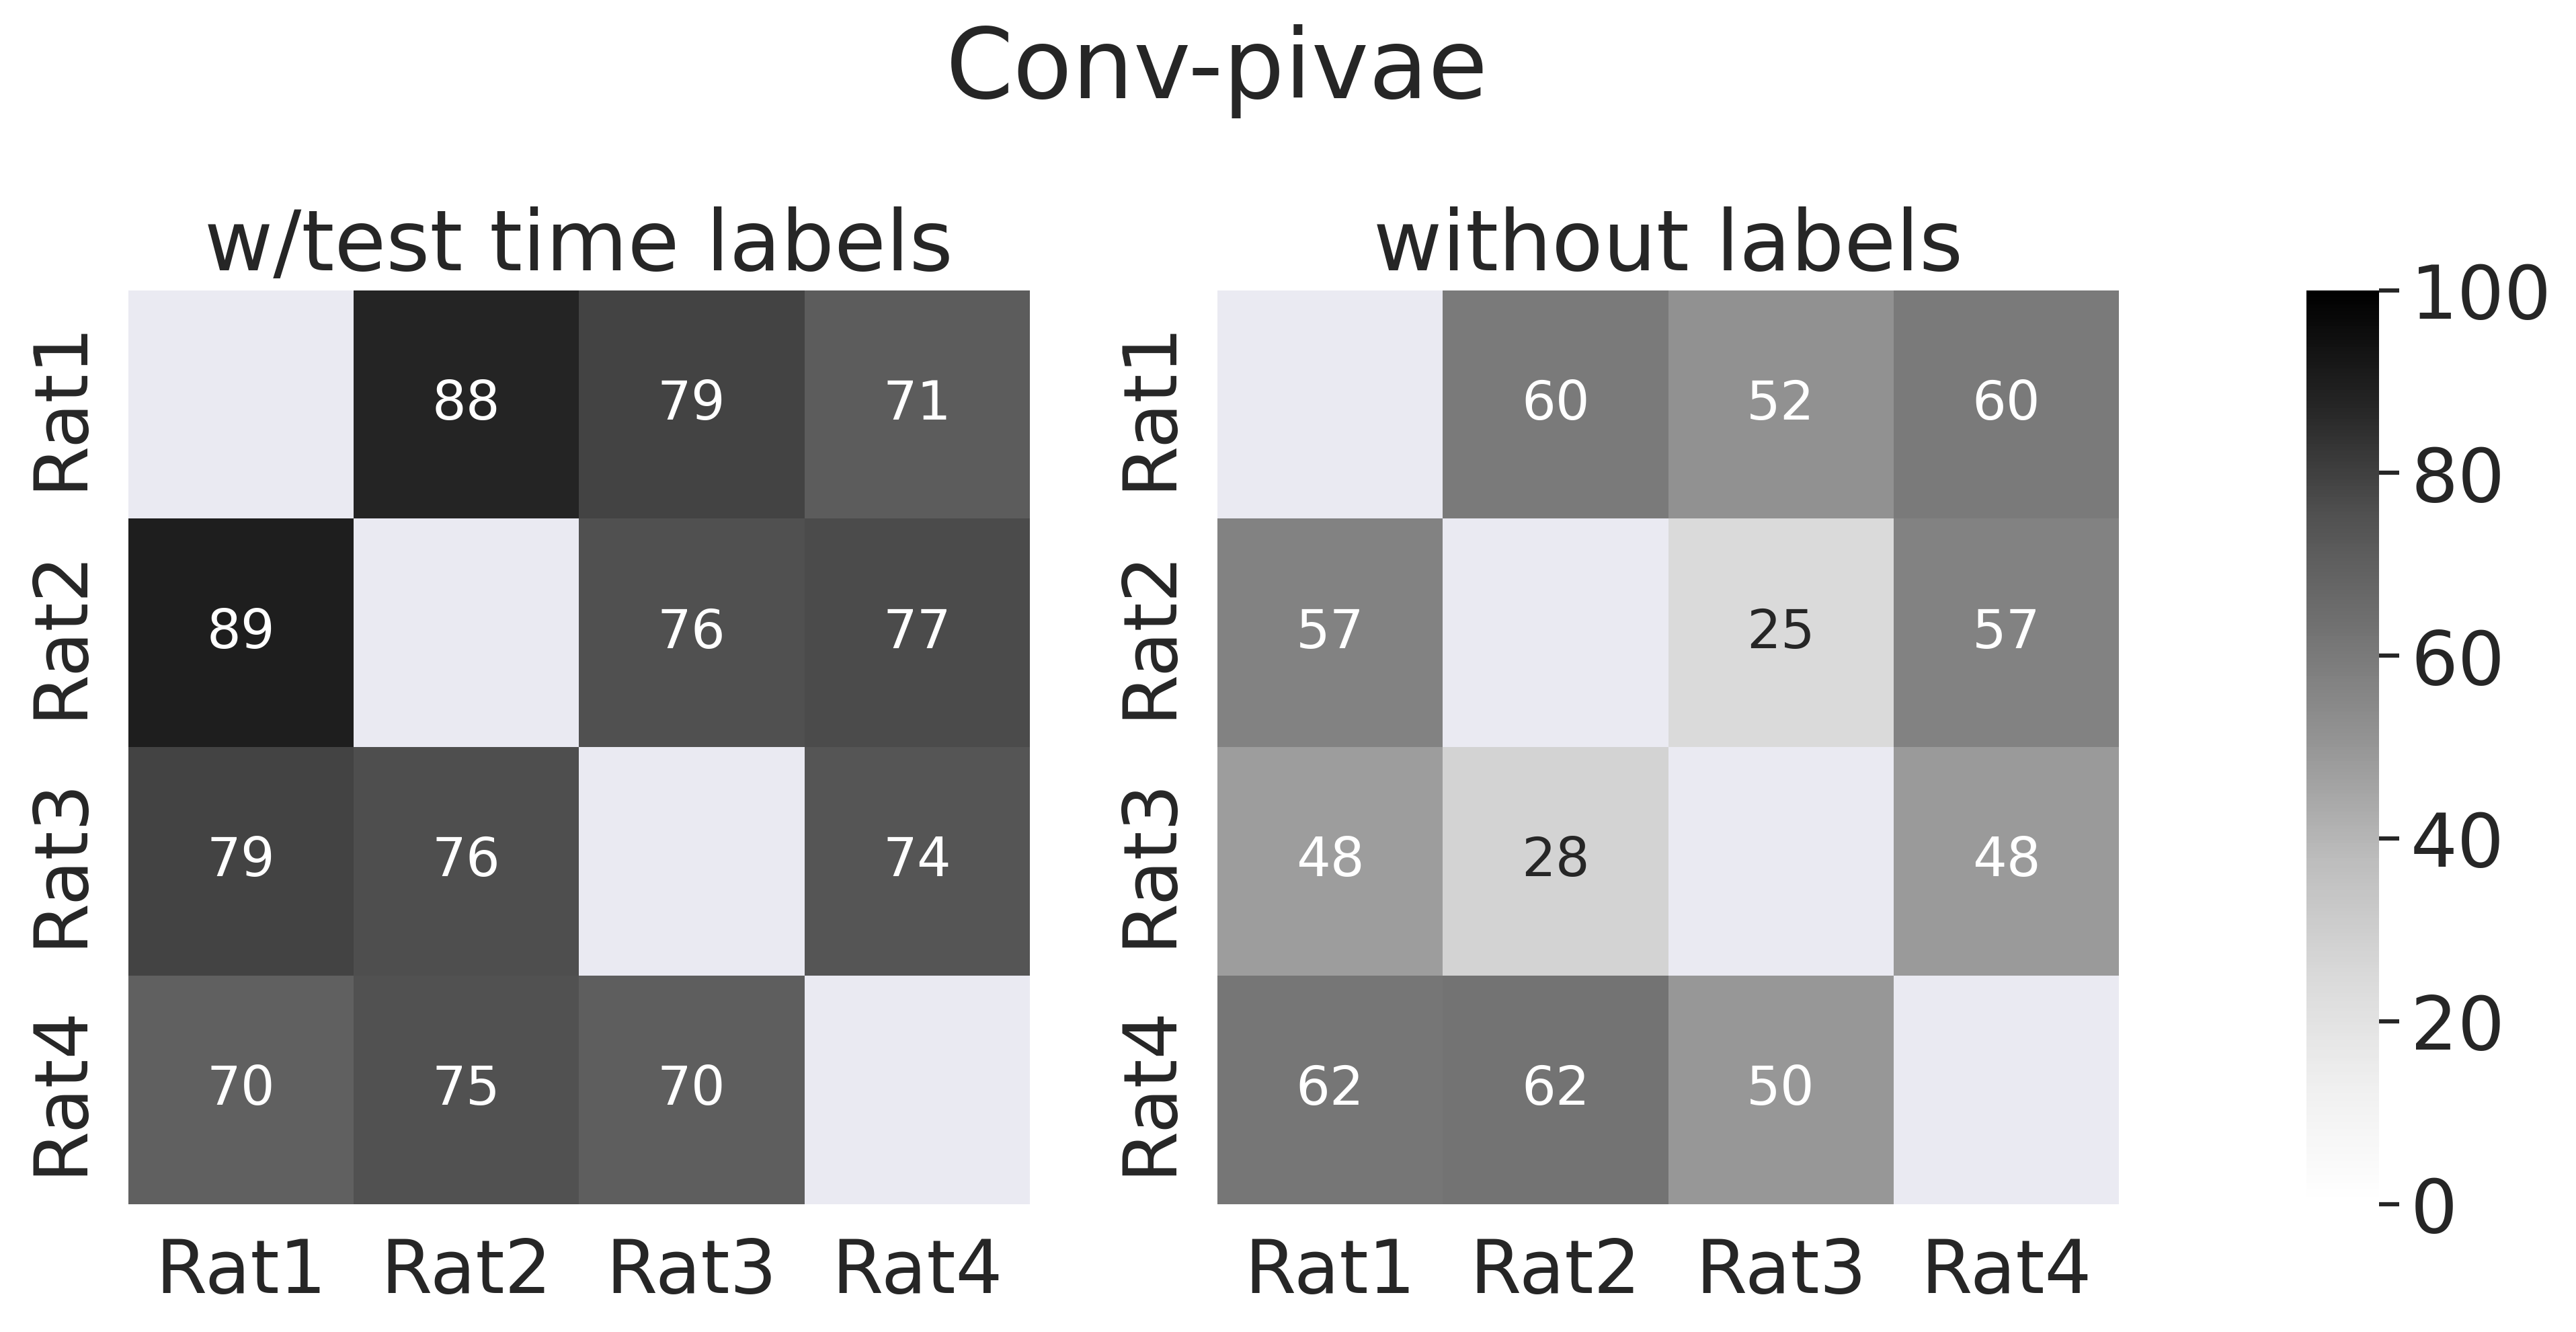

In [35]:
methods_name = ["w/test time labels", "without labels"]


def prepare_heatmap(scores, n_item):
    scores = scores.reshape(n_item, n_item - 1)
    return np.array([np.insert(scores[i], i, None) for i in range(n_item)])


fig, axs = plt.subplots(
    ncols=3,
    nrows=1,
    figsize=(12, 5),
    gridspec_kw={"width_ratios": [1, 1, 0.08]},
    dpi=360,
)
fig.suptitle("original-pivae", y=1.1)
subjects = ["Rat1", "Rat2", "Rat3", "Rat4"]
scores = [
    data["original_pivae"]["w_label"]["consistency"],
    data["original_pivae"]["wo_label"]["consistency"],
]

sns.set(font_scale=2.0)

for i, method in enumerate(methods_name):
    score = prepare_heatmap(np.array(scores[i]), 4)
    if i == 0:
        hmap = sns.heatmap(
            ax=axs[i],
            data=score,
            vmin=0.0,
            vmax=100,
            cmap=sns.color_palette("Greys", as_cmap=True),
            annot=True,
            xticklabels=subjects,
            annot_kws={"fontsize": 16},
            yticklabels=subjects,
            cbar=False,
        )
    elif i == 1:
        hmap = sns.heatmap(
            ax=axs[i],
            data=score,
            vmin=0.0,
            vmax=100,
            cmap=sns.color_palette("Greys", as_cmap=True),
            annot=True,
            xticklabels=subjects,
            annot_kws={"fontsize": 16},
            yticklabels=subjects,
            cbar_ax=axs[2],
        )
    hmap.set_title(method, fontsize=25)


plt.subplots_adjust(wspace=0.3)
axs[-1].set_xlabel("R2")

fig, axs = plt.subplots(
    ncols=3,
    nrows=1,
    figsize=(12, 5),
    gridspec_kw={"width_ratios": [1, 1, 0.08]},
    dpi=360,
)
fig.suptitle("Conv-pivae", y=1.1)
subjects = ["Rat1", "Rat2", "Rat3", "Rat4"]
scores = [
    data["conv_pivae"]["w_label"]["consistency"],
    data["conv_pivae"]["wo_label"]["consistency"],
]

sns.set(font_scale=2.0)

for i, method in enumerate(methods_name):
    score = prepare_heatmap(np.array(scores[i]), 4)
    if i == 0:
        hmap = sns.heatmap(
            ax=axs[i],
            data=score,
            vmin=0.0,
            vmax=100,
            cmap=sns.color_palette("Greys", as_cmap=True),
            annot=True,
            xticklabels=subjects,
            annot_kws={"fontsize": 16},
            yticklabels=subjects,
            cbar=False,
        )
    elif i == 1:
        hmap = sns.heatmap(
            ax=axs[i],
            data=score,
            vmin=0.0,
            vmax=100,
            cmap=sns.color_palette("Greys", as_cmap=True),
            annot=True,
            xticklabels=subjects,
            annot_kws={"fontsize": 16},
            yticklabels=subjects,
            cbar_ax=axs[2],
        )
    hmap.set_title(method, fontsize=25)


plt.subplots_adjust(wspace=0.3)
axs[-1].set_xlabel("R2")